In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [5]:
train_data.shape,test_data.shape

((20279, 17), (13519, 16))

In [11]:
train_data.isnull().sum(),test_data.isnull().sum(),train_data.shape,test_data.shape,train_data.dtypes

(gift_id                  0
 gift_type                0
 gift_category            0
 gift_cluster             0
 instock_date             0
 stock_update_date        0
 lsg_1                    0
 lsg_2                    0
 lsg_3                    0
 lsg_4                    0
 lsg_5                    0
 lsg_6                    0
 uk_date1                 0
 uk_date2                 0
 is_discounted            0
 volumes              12956
 price                    0
 dtype: int64,
 gift_id                 0
 gift_type               0
 gift_category           0
 gift_cluster            0
 instock_date            0
 stock_update_date       0
 lsg_1                   0
 lsg_2                   0
 lsg_3                   0
 lsg_4                   0
 lsg_5                   0
 lsg_6                   0
 uk_date1                0
 uk_date2                0
 is_discounted           0
 volumes              2352
 dtype: int64,
 (20279, 17),
 (13519, 16),
 gift_id               object
 gif

In [12]:
del train_data["volumes"]
del test_data["volumes"]

In [13]:
train_data['gift_id'] = train_data.gift_id.str.extract('(\d+)')
test_data['gift_id'] = test_data.gift_id.str.extract('(\d+)')

In [14]:
train_data.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,price
0,11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,175.54
1,11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,95.80
2,15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,107.35
3,11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,172.90
4,11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,77.72


In [15]:
train_data['gift_id'] = train_data['gift_id'].astype(int)
test_data['gift_id'] = test_data['gift_id'].astype(int)

In [16]:
k = ['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
    train_data[i] = pd.to_datetime(train_data[i])
    test_data[i] = pd.to_datetime(test_data[i])

In [18]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  test_data[i+'_'+'year'] = test_data[i].dt.year
  test_data[i+'_'+'day'] = test_data[i].dt.day
  test_data[i+'_'+'weekofyear'] = test_data[i].dt.weekofyear
  test_data[i+'_'+'month'] = test_data[i].dt.month
  test_data[i+'_'+'dayofweek'] =test_data[i].dt.dayofweek
  test_data[i+'_'+'weekend'] = (test_data[i].dt.weekday >=5).astype(int)
  test_data[i+'_'+'hour'] = test_data[i].dt.hour
  test_data[i+'_'+'minute'] = test_data[i].dt.minute
  train_data[i+'_'+'year'] = train_data[i].dt.year
  train_data[i+'_'+'day'] = train_data[i].dt.day
  train_data[i+'_'+'weekofyear'] = train_data[i].dt.weekofyear
  train_data[i+'_'+'month'] = train_data[i].dt.month
  train_data[i+'_'+'dayofweek'] = train_data[i].dt.dayofweek
  train_data[i+'_'+'weekend'] = (train_data[i].dt.weekday >=5).astype(int)
  train_data[i+'_'+'hour'] = train_data[i].dt.hour
  train_data[i+'_'+'minute'] = train_data[i].dt.minute

In [19]:
k=['instock_date','stock_update_date','uk_date1','uk_date2']
for i in k:
  del train_data[i]
  del test_data[i]

In [21]:
c=train_data['price']
del train_data['price']
train_data['price']=c

In [23]:
train_data.head()

,gift_id,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,...,uk_date1_minute,uk_date2_year,uk_date2_day,uk_date2_weekofyear,uk_date2_month,uk_date2_dayofweek,uk_date2_weekend,uk_date2_hour,uk_date2_minute,price
0,11156,61,534,3942,3377,5221,504,1912,10,554,...,7,2014,24,9,2,0,0,7,7,175.54
1,11157,61,534,3942,3377,5221,504,1912,10,554,...,7,2014,24,9,2,0,0,6,7,95.80
2,15689,584,262,0,5290,1579,3203,1912,9,1578,...,4,2016,18,11,3,4,0,2,0,107.35
3,11155,61,534,3942,3377,5221,504,1912,10,554,...,49,2016,6,44,11,6,1,4,0,172.90
4,11158,61,534,3942,3377,5221,504,1912,9,554,...,49,2016,6,44,11,6,1,1,0,77.72


In [24]:
train_df=train_data


In [25]:
x = train_df.drop(labels=['price'], axis=1)
y = train_df['price'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16223, 43), (4056, 43), (16223,), (4056,))

In [30]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
import lightgbm  as lgb

In [34]:
train = lgb.Dataset(x_train, label=y_train)
test = lgb.Dataset(x_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }
        

In [35]:
lgbm = lgb.train(params=param, verbose_eval=100, train_set=train, valid_sets=[test])

y_pred_lgbm = lgbm.predict(x_test)
print('RMAE:', sqrt(mean_absolute_error(y_test,y_pred_lgbm)))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3031
[LightGBM] [Info] Number of data points in the train set: 16223, number of used features: 43
[LightGBM] [Info] Start training from score 142.034606
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 132.005
[200]	valid_0's rmse: 129.446
[300]	valid_0's rmse: 128.732
[400]	valid_0's rmse: 128.336
[500]	valid_0's rmse: 128.058
Did not meet early stopping. Best iteration is:
[479]	valid_0's rmse: 128.022
RMAE: 6.395038472524296


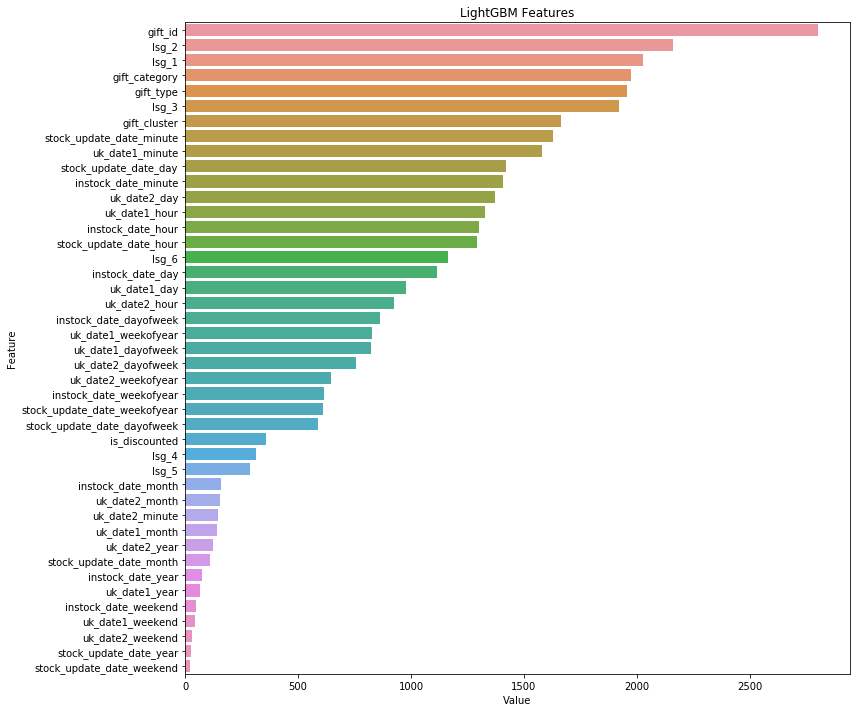

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt;

feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), x.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [38]:
Xtest = test_data

In [41]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(x):
    X_train, X_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.90)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", 100-sqrt(mean_absolute_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSLE LGBM:  93.26818403684945
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSLE LGBM:  93.16100380610055
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSLE LGBM:  93.21321064020346
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSLE LGBM:  93.12730879125974


In [42]:
import numpy as np

In [43]:
np.mean(errlgb,0)


6.807573181396701

In [44]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([ 80.18659964, 115.30881659,  46.48477236, ..., 271.89992688,
       244.33447202, 159.65817952])

In [49]:
submission = pd.DataFrame({
        "gift_id": test_data['gift_id'],
        "price": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

       gift_id       price
0         2372   80.186600
1        13040  115.308817
2         5754   46.484772
3         1417   85.655374
4        23204   47.214056
...        ...         ...
13514    29169  257.690062
13515    29165  262.610323
13516    29168  271.899927
13517    33797  244.334472
13518    33798  159.658180

[13519 rows x 2 columns]


In [50]:
test_data.shape

(13519, 43)

In [52]:
test_data['gift_id'] = test_data['gift_id'].astype(str)